In [6]:
# Imports and plotting setups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math

import sys, os
sys.path.insert(0, '../../')
sys.path.insert(0, '../')

import math_funcs

from cycler import cycler

default_cycler = (cycler(color=['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black']) +
                cycler(linestyle=['-', '--', ':', '-.', '-', '--', ':']))

plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)

plt.rcParams["font.family"] = "Times"
plt.rcParams["font.size"] = 8

plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.rcParams['figure.dpi'] = 200

plt.rcParams['text.usetex'] = True

from scipy.constants import (
    epsilon_0,   # Permittivity of free space (vacuum)
    mu_0,        # Permeability of free space (vacuum)
    c,           # Speed of light in vacuum
    #e,           # Elementary charge
    #h,           # Planck constant
    #hbar,        # Reduced Planck constant (h-bar)
    k,           # Boltzmann constant
    #G,           # Newtonian constant of gravitation
    #m_e,         # Electron mass
    #m_p,         # Proton mass
    #m_n,         # Neutron mass
    #alpha,       # Fine-structure constant
    eV,          # Electron volt
)

# Example usage of some constants
print(f"Permittivity of free space: {epsilon_0} F/m")
print(f"Permeability of free space: {mu_0} N/A^2")
print(f"Speed of light in vacuum: {c} m/s")
# print(f"Elementary charge: {e} C")
# print(f"Planck constant: {h} J·s")
# print(f"Reduced Planck constant: {hbar} J·s")
print(f"Boltzmann constant: {k} J/K")
# print(f"Newtonian constant of gravitation: {G} m^3/kg/s^2")
# print(f"Electron mass: {m_e} kg")
# print(f"Proton mass: {m_p} kg")
# print(f"Neutron mass: {m_n} kg")
# print(f"Fine-structure constant: {alpha}")
print(f"Electron volt: {eV} J")

def print_engineering_notation(value):
    """
    Print a value in engineering notation (powers of ten in multiples of 3).

    Parameters:
    value (float): The value to be printed in engineering notation.
    """
    
    if value == 0:
        print("0")
        return

    exponent = int(math.floor(math.log10(abs(value)) / 3) * 3)
    mantissa = value / (10 ** exponent)
    
    print(f"{mantissa:.3f}e{exponent}")

# Example usage
print_engineering_notation(0)          # Output: 0
print_engineering_notation(1234.56)    # Output: 1.235e3
print_engineering_notation(0.00123456) # Output: 1.235e-3
print_engineering_notation(-987654)    # Output: -987.654e3
print_engineering_notation(1e9)        # Output: 1.000e9

from pucks_to_penetrate_cryosphere import calc_path_loss

from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D

Permittivity of free space: 8.8541878128e-12 F/m
Permeability of free space: 1.25663706212e-06 N/A^2
Speed of light in vacuum: 299792458.0 m/s
Boltzmann constant: 1.380649e-23 J/K
Electron volt: 1.602176634e-19 J
0
1.235e3
1.235e-3
-987.654e3
1.000e9


In [7]:
lb_sj_rho_salt0_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_low_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
lb_sj_rho_salt1e6_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_low_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-06.csv')
lb_sj_rho_salt1e5_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_low_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
lb_sj_rho_salt1e4_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_low_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-04.csv')
lb_sj_rho_salt1e3_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_low_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
lb_sj_rho_salt4p2e2_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_low_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

# hb_sj_rho_salt0_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_high_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
# hb_sj_rho_salt1e6_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_high_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-06.csv')
# hb_sj_rho_salt1e5_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_high_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
# hb_sj_rho_salt1e4_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_high_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-04.csv')
# hb_sj_rho_salt1e3_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_high_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
# hb_sj_rho_salt4p2e2_df = pd.read_csv('2025-01-14_12-44-27/recorded_data_high_bandsub jovian point10000p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

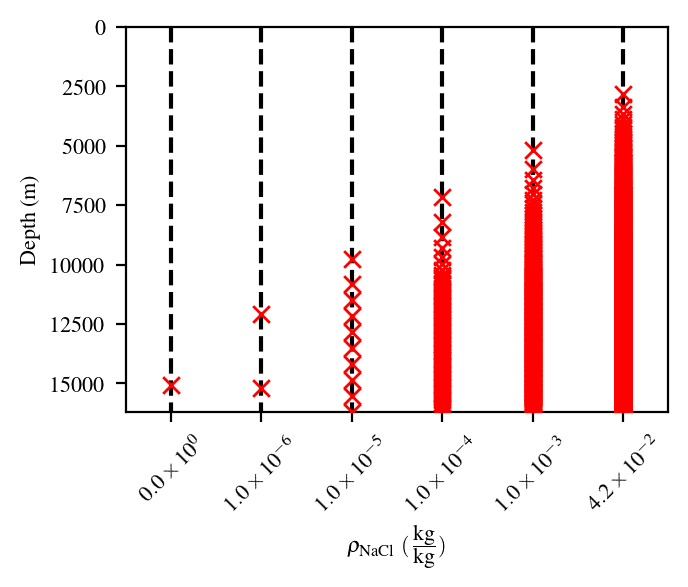

In [9]:
# Data from the dataset
max_depth = 16200  # Maximum value for the vertical line

# Create the plot
fig = plt.figure(figsize=(3.5,2.5))

dfs = [
    lb_sj_rho_salt0_df,
    lb_sj_rho_salt1e6_df,
    lb_sj_rho_salt1e5_df,
    lb_sj_rho_salt1e4_df,
    lb_sj_rho_salt1e3_df,
    lb_sj_rho_salt4p2e2_df]
labels = [
    r'$0.0\times10^{0}$',  
    r'$1.0\times10^{-6}$', 
    r'$1.0\times10^{-5}$', 
    r'$1.0\times10^{-4}$', 
    r'$1.0\times10^{-3}$', 
    r'$4.2\times10^{-2}$']

i = 0
for label, df in zip(labels, dfs):
    i += 1
    depths = df['Placement Depth (m)'][1:-1]
    # Plot the first line and points
    plt.plot([i, i], [0, max_depth], color='black', linestyle='--', linewidth=1.5, label=label)
    plt.scatter([i] * len(depths), depths, color='red', label="Depth Points Line 1", zorder=5, marker='x')

# Customize the plot
plt.ylim(max_depth, 0)
plt.xlim(0.5, len(labels)+0.5)
plt.xticks(np.arange(len(labels))+1.0, labels, rotation=45)
plt.ylabel('Depth (m)')
plt.xlabel(r'$\rho_{\rm{NaCl}}$ $(\frac{\textrm{kg}}{\textrm{kg}})$')

# Show the plot
plt.show()

In [10]:
# Plot as a cumulative distribution
df.index

RangeIndex(start=0, stop=894, step=1)

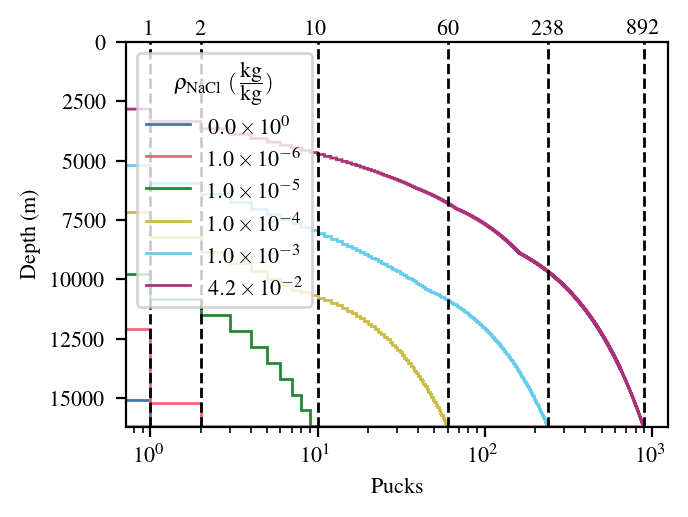

In [44]:
# Data from the dataset
max_depth = 16200  # Maximum value for the vertical line

# Create the plot
fig = plt.figure(figsize=(3.5,2.5))

dfs = [
    lb_sj_rho_salt0_df,
    lb_sj_rho_salt1e6_df,
    lb_sj_rho_salt1e5_df,
    lb_sj_rho_salt1e4_df,
    lb_sj_rho_salt1e3_df,
    lb_sj_rho_salt4p2e2_df]
labels = [
    r'$0.0\times10^{0}$',  
    r'$1.0\times10^{-6}$', 
    r'$1.0\times10^{-5}$', 
    r'$1.0\times10^{-4}$', 
    r'$1.0\times10^{-3}$', 
    r'$4.2\times10^{-2}$']

i = 0
# previous_y = 0
for label, df, color, pattern, label in zip(labels, dfs, 
    ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black'], 
    ['-', '--', ':', '-.', '-', '--', ':'], labels):

    depths = df['Placement Depth (m)']
    plt.stairs(df.index[:-1], depths, label=label, 
        orientation='horizontal', color=color, linestyle='-')
    plt.axvline(x=df.index[-2], color='black', linestyle='--')
    plt.text(df.index[-2], -100, f'{df.index[-2]}', color='black', 
             va='bottom', ha='center', fontsize=8)
    i += 1

plt.ylabel('Depth (m)')
plt.ylim(max_depth, 0)

plt.xscale('log')
plt.xlabel('Pucks')
plt.legend(title=r'$\rho_{\rm{NaCl}}$ $(\frac{\textrm{kg}}{\textrm{kg}})$')
# Show the plot
plt.show()

In [34]:
for color, pattern in zip(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black'], ['-', '--', ':', '-.', '-', '--', ':']):
    print(pattern)

-
--
:
-.
-
--
:


In [18]:
lb_sj_rho_salt0_df['Placement Depth (m)']

0        0.0
1    15070.0
2    16200.0
Name: Placement Depth (m), dtype: float64

In [13]:
df.index, depths

(RangeIndex(start=0, stop=894, step=1),
 0          0.0
 1       2830.0
 2       3350.0
 3       3660.0
 4       3890.0
         ...   
 889    16160.0
 890    16170.0
 891    16180.0
 892    16190.0
 893    16200.0
 Name: Placement Depth (m), Length: 894, dtype: float64)